In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import sys
import os

WRKON_JUPYTER = os.path.exists('../../resources')

if WRKON_JUPYTER:
    sys.path.append(os.path.abspath('../..'))
    import data_loader as loader
    import prep as prep
    import visualizer as vis

else:
    sys.path.append(os.path.abspath('..'))
    from . import data_loader as loader
    from . import prep
    from . import visualizer as vis

import resources

In [2]:
import pandas as pd

In [3]:
def run():

    # LOAD DATA + GET TAG CNTS
    # -> IMP ON data_loader.py + .ipynb
    data = None
    start, end = loader.get_user_input()
    if not start or not end:
        return False

    print('load data')
    tag_cnts = {sid1 : loader.get_title_cnt_in_period(start, end, sid1) for sid1 in resources.SID_1S}
    
    if not os.path.exists('tst_data.csv') : 
        
        data = loader.load_raw_data(start, end)
        
        
        # loader.crawl(start, end, time_sleep=0.2, page_start=225)
    
    
        # PREP DATA
        # -> IMP ON prep.py + .ipynb
        data['titles'] = data['titles'].apply(prep.normalize_punct)
    
        print('tknz data')
        data['titles'] = data['titles'].apply(prep.custom_tokenize)
    
        print('melt data')
        data = prep.melt_titles(data)

    else :
        data = pd.read_csv('tst_data.csv', usecols=['dates', 'tokens', 'counts'])

    #cntvec = prep.get_cntvec(data)
    #top_ns = cntvec[prep.get_top_n_tokens(cntvec)]

    cntvec = prep.tst_pt(data)
    top_ns = cntvec.T[prep.get_top_n_tokens(cntvec.T)]
    
    top_n_tokens_period = prep.get_top_n_tokens_from_period(cntvec)
    word_changes = prep.analyze_word_frequency_change(top_n_tokens_period)

    board = vis.plot_board(tag_cnts, top_ns, word_changes, start, end)
    plt.show()
    
    return True

분석 시작 지점을 예시와 같이 입력하시오 (ex. 2024년 1월 1일 -> 20240101) 20240101
분석 종료 지점을 예시와 같이 입력하시오 (ex. 2024년 1월 1일 -> 20240101) 20240103



	분석 시작일 : 2024년 01월 01일
	분석 종료일 : 2024년 01월 03일



맞으면 y, 틀리면 n을 입력하시오([y]/n) 


load data


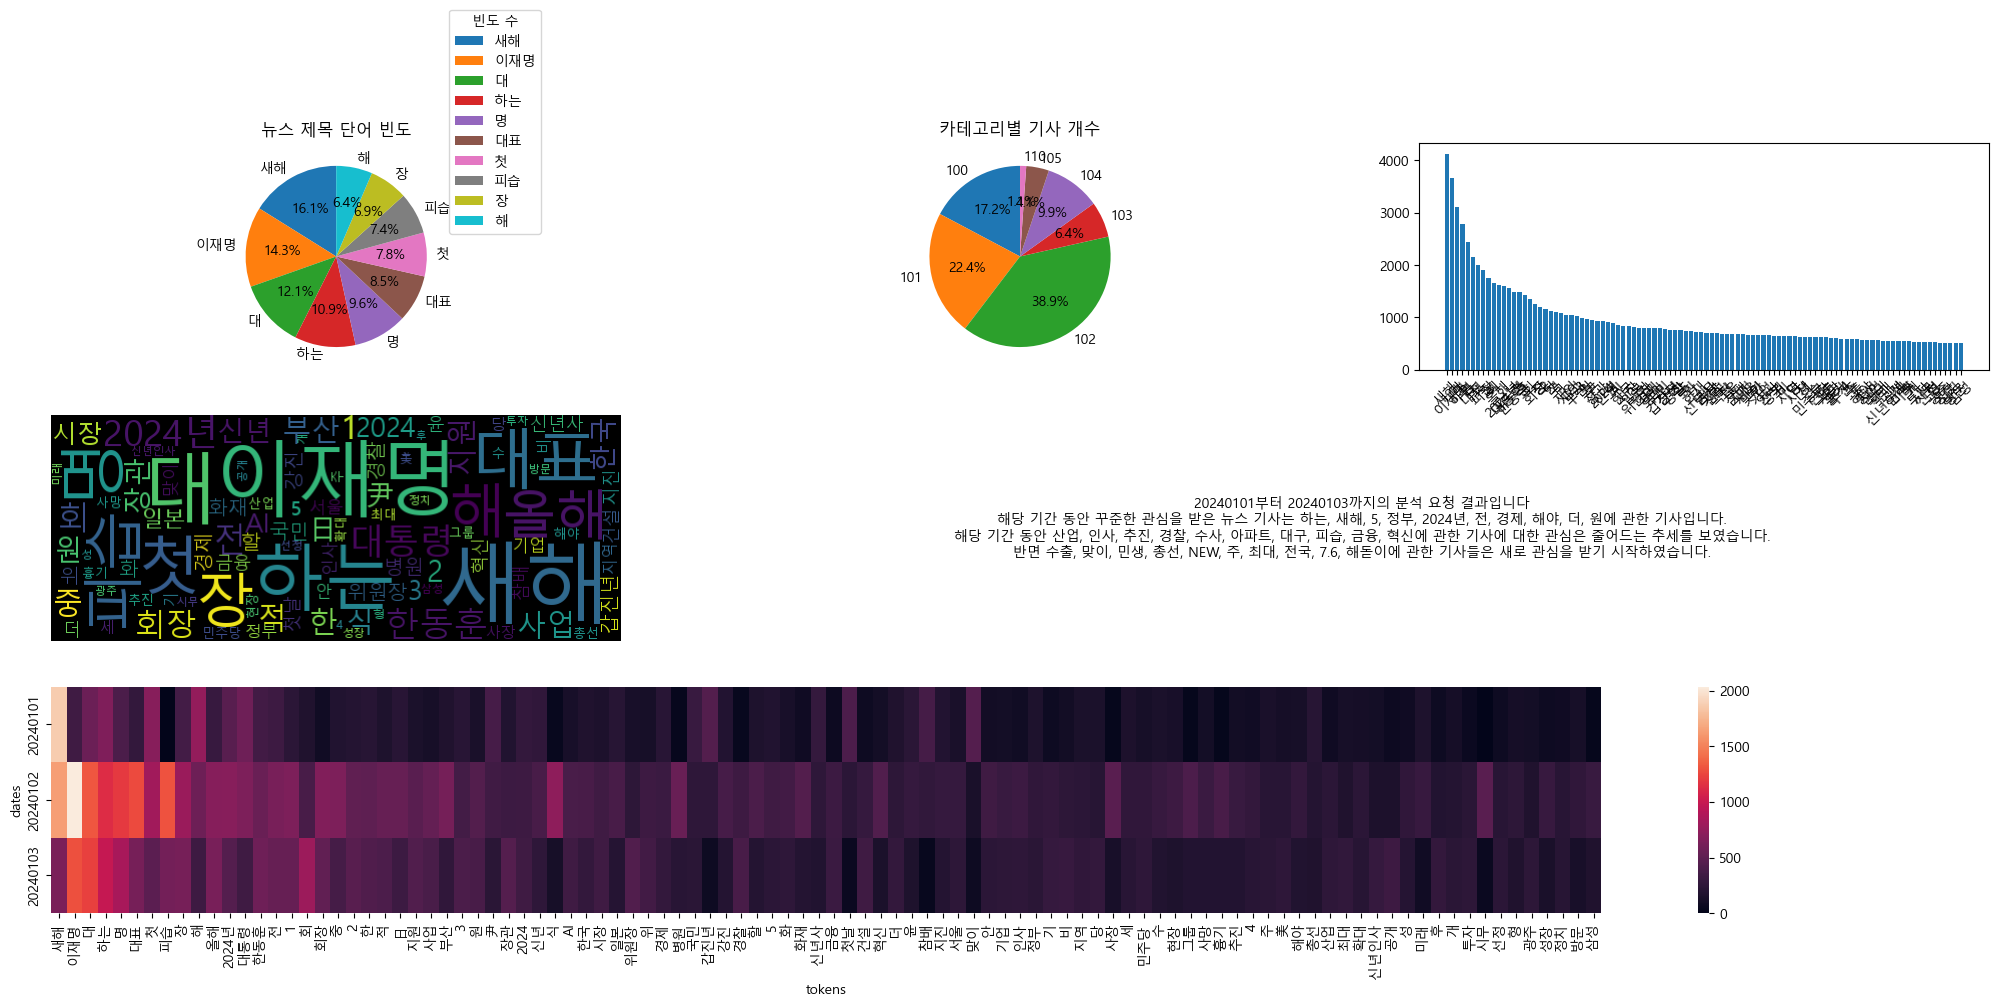

True

In [4]:
run()

In [18]:
set(pd.Index(['a', 'b', 'c']))

{'a', 'b', 'c'}